## Assessment of Data and Applying Normalization




# Import the libraries

In [62]:
import numpy as nm
import pandas as pd
import seaborn as seaborn_plot
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

# Import the data

In [2]:
abalone_data = pd.read_csv("file:///Users/amandeepkaur/Downloads/abalone.csv",
names= ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 
'Viscera_weight','Shell_weight', 'Rings'])

abalone_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# 1. Checking for missing values

In [41]:
abalone_data.info()
print('\n' "NA Values = " + str(abalone_data.isna().sum().sum()) )
print("NaN Values = " + str(abalone_data.isnull().sum().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB

NA Values = 0
NaN Values = 0



### Findings :                                                                                              
1. The dataset is regarding abalone(marine snails). The data consists of the features of abalone consisting                gender,length, height, weight, rings, etc.                              
2. Dataset has 19 Variables and 4177 Observations.                                 
3. It contains 7 variables of type float, 1 of integer and 1 categorical variable named 'Sex".                   
4. There are **no missing** values in the data.                                                           

# **2. Summarizing the data**

In [4]:
abalone_data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [26]:
df_data = abalone_data.iloc[:,1:]

df_mean = df_data.mean()
df_median = df_data.median()
df_mode = df_data.mode()
df_std = df_data.std()
df_var = df_data.var()
df_skew = df_data.skew()
df_kurtosis = df_data.kurtosis()

#Putting all together
df_results = pd.concat([df_mean, df_median, df_mode.iloc[0,:], df_std, df_var, df_skew, df_kurtosis],axis=1,keys=["Mean", "Median", "Mode", "Std Dev","Variance","Skew", "Kurtosis"])
df_results

,Mean,Median,Mode,Std Dev,Variance,Skew,Kurtosis
Length,0.523992,0.5450,0.5500,0.120093,0.014422,-0.639873,0.064621
Diameter,0.407881,0.4250,0.4500,0.099240,0.009849,-0.609198,-0.045476
Height,0.139516,0.1400,0.1500,0.041827,0.001750,3.128817,76.025509
Whole_weight,0.828742,0.7995,0.2225,0.490389,0.240481,0.530959,-0.023644
Shucked_weight,0.359367,0.3360,0.1750,0.221963,0.049268,0.719098,0.595124
Viscera_weight,0.180594,0.1710,0.1715,0.109614,0.012015,0.591852,0.084012
Shell_weight,0.238831,0.2340,0.2750,0.139203,0.019377,0.620927,0.531926
Rings,9.933684,9.0000,9.0000,3.224169,10.395266,1.114102,2.330687


### Findings :                                                                                                                              
1. Height has a minimum value of zero, which is not possible, the entry is erraneous .                     
2. The value of Rings ranges from 1 to 29.                                                            
3. The mean of 'Length' and 'Diameter' is below 50% of the total data.                                            
4. A few of the variables (such as Height and Rings) have the maximum value much higher from the 3rd quartile indicating the presence of outliers.   
5. The data is skewed and has kurtosis again indicating the distribution is not normal and the presence of outliers.                                                                                              
6. Rings is of type Integer, 1st Quartile = 8 and 2nd Quartile = 9, indicating that the maximum number of abalone has 9 Rings according to the dataset.
7. The mean tries to describe the center of the data but since the skewness of every feature is different from zero we can conclude that the distribution is not symmetrical and the mean might not be the best statistic value to describe the data.

# **3. Visualising the data**

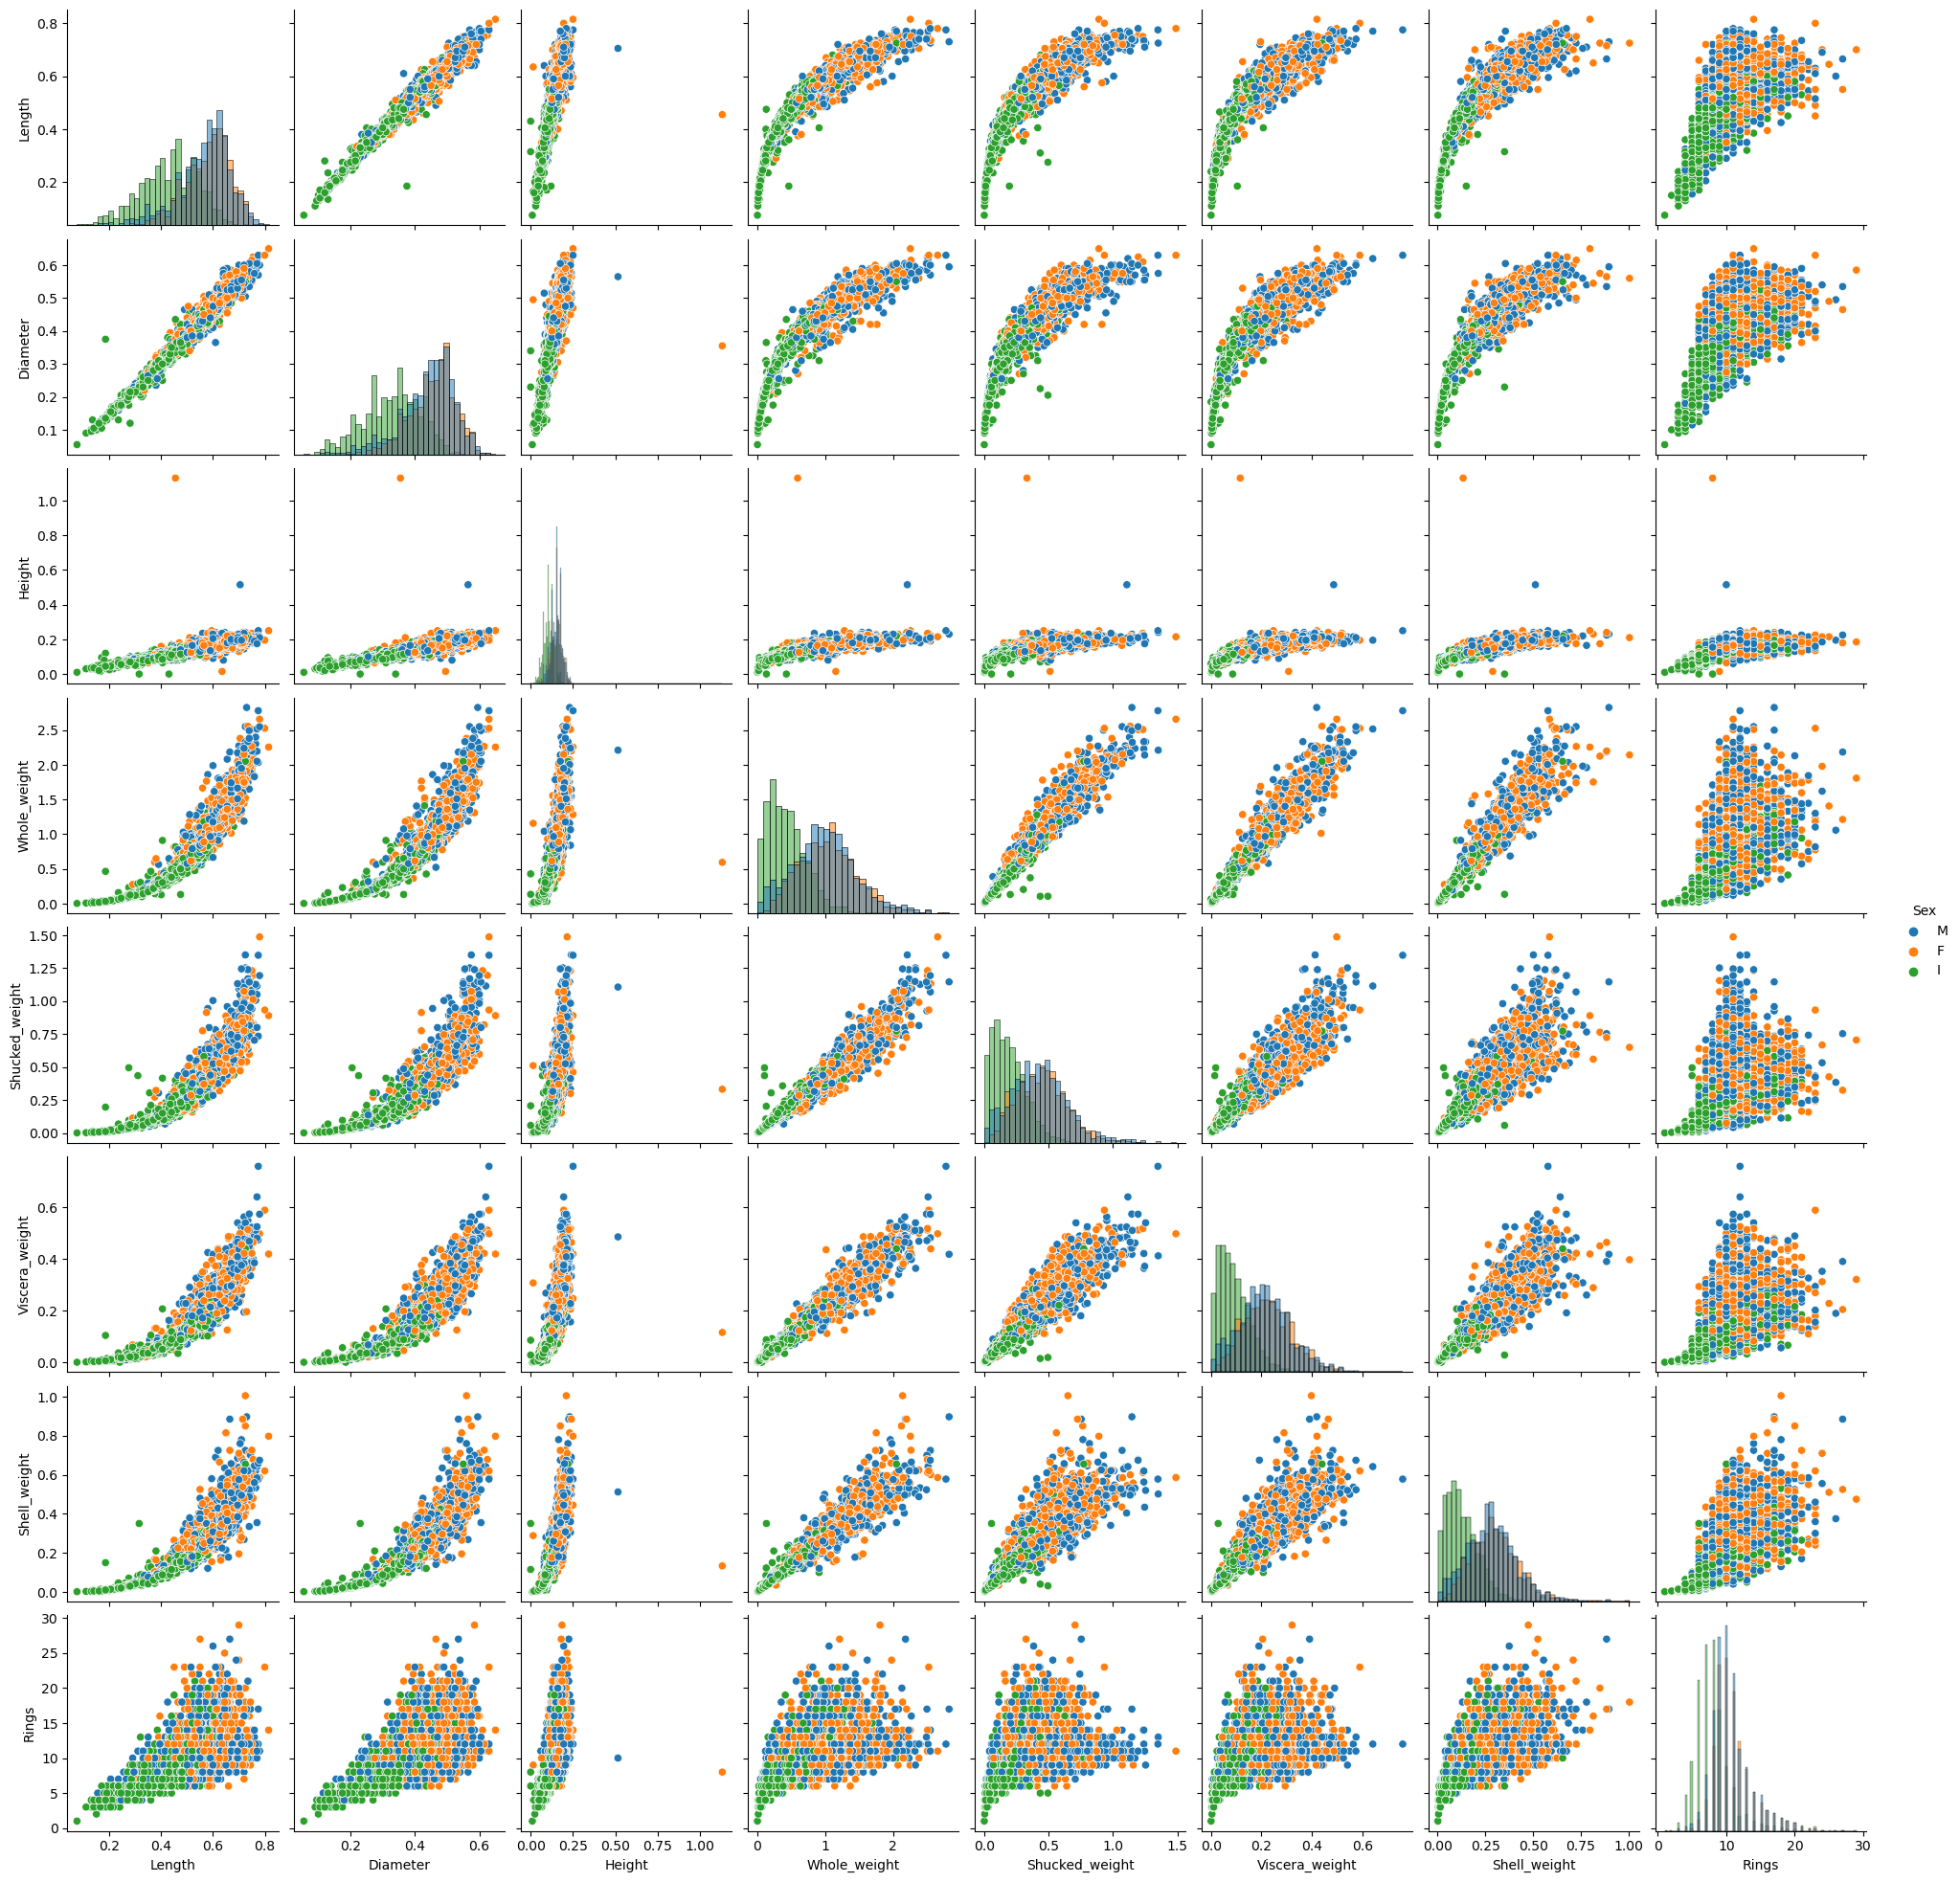

In [47]:
seaborn_plot.pairplot(abalone_data, hue = 'Sex', diag_kind="hist")
plt.show()

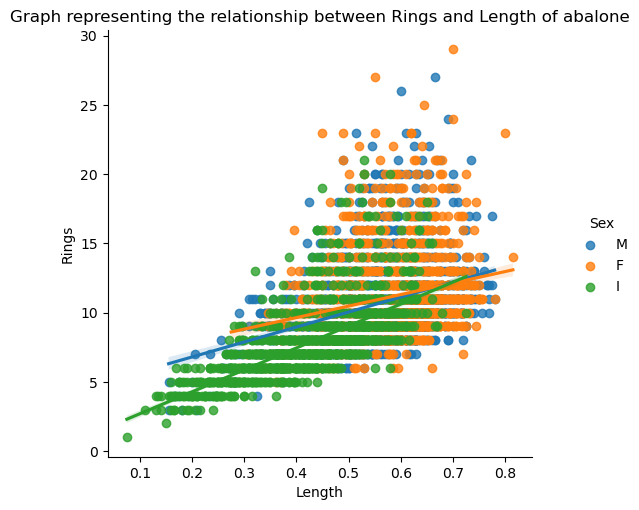

In [43]:
height_rings_plot = seaborn_plot.lmplot(data = abalone_data, x = 'Length', y =  'Rings', hue = 'Sex')
height_rings_plot.set(title = "Graph representing the relationship between Rings and Length of abalone")
plt.show()

### Findings

1. Length and height are directly related to each to other, more the height more the diameter.
2. Height, weight, length, rings, the value of all these attributes are less in Infants than Male and Females.
3. It is evident from the pairplot that dataset has some outliers.
4. Length and Height behaves almost similar with respect to all the other features.
5. Shell Weight, Viscera Weight, Shucked Weight and Whole Weight behaves have an almost identical behaviour towards other features.

Rings Vs Length plot
1. The number of Rings go up as the length increases.
2. However, it is noticed that as the length increases, there is higher level of dispersion of number of Rings. 

# 4. Is the dataset Balanced ?

In [44]:
abalone_data.groupby('Rings').size()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
dtype: int64

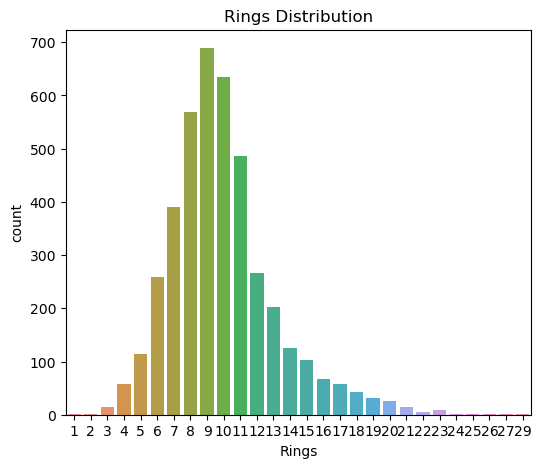

In [51]:
plt.figure(figsize= (6,5))
seaborn_plot.countplot(abalone_data['Rings'])
plt.title("Rings Distribution")
plt.show()


**The distribution of Rings is not uniform, the density of number of rings is concentrated more in the range of 8-10. Hence, the dataset is not balanced.**

Some of the corrective methods to balance a dataset are :
1. Resampling (Oversampling and Undersampling)
2. Ensembling Methods (Ensemble of Sampler)

# 5. Normalizing  the data using z-score

In [61]:
stats.zscore(abalone_data.iloc[:, 1:-1])

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739
